In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [11]:
ci = np.array([[0, 1, 0, -1, 0, 1, -1, -1, 1], 
               [0, 0, 1, 0, -1, 1, 1, -1, -1]])

In [12]:
fi_exact = np.load("fi_exact_taylor.npy")
fi_2ndCL = np.load("fi_2nd CL_taylor.npy")

In [13]:
def get_macro_quantities(fi):
    rho = np.sum(fi, axis=2)  # Density
    ux = np.sum(fi * ci[0], 2) / rho
    uy = np.sum(fi * ci[1], 2) / rho
    
    return rho, ux, uy

In [14]:
def rmse(a, b):
    rmse = np.sqrt(np.mean(((a - b))**2)) # / a
    return rmse

def mae(a, b):
    error = np.mean(np.abs(a - b))
    return error

def ae_re(a, b):
    ae = np.abs(a - b)
    re = np.abs((a - b) / a)
    return ae, re

In [15]:
MAEs, AEs, REs = [], [], []

for t in range(20):
    # Compute macro velocity
    _, uxe1t, uye1t = get_macro_quantities(fi_exact[t])
    umite = np.linalg.norm(np.stack([uxe1t, uye1t]), axis=0)
    
    _, uxc1t, uyc1t = get_macro_quantities(fi_2ndCL[t])
    umitc = np.linalg.norm(np.stack([uxc1t, uyc1t]), axis=0)
    
    # Error data calculation
    maes = mae(umite, umitc)
    aes, res = ae_re(umite, umitc)
    
    # Error data storagement
    MAEs.append(maes)
    AEs.append(aes)
    REs.append(res)

In [16]:
RMSEs = []

for t in range(20):
    rmses = 0.0
    for i in range(9):
        rmses += rmse(fi_exact[t, :, :, i], fi_2ndCL[t, :, :, i]) / 9
        
    RMSEs.append(rmses)

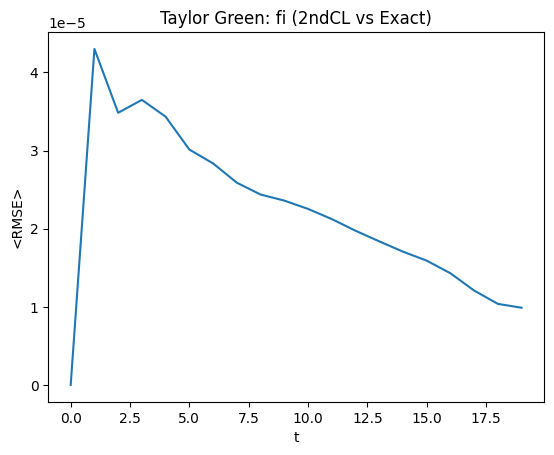

In [17]:
t = np.arange(20)

plt.plot(t, RMSEs)
plt.xlabel("t")
plt.ylabel("<RMSE>")
plt.title("Taylor Green: fi (2ndCL vs Exact)")
plt.show()

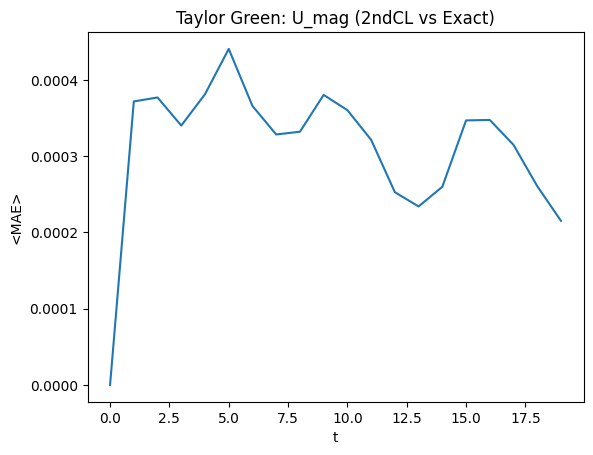

In [18]:
plt.plot(t, MAEs)
plt.xlabel("t")
plt.ylabel("<MAE>")
plt.title("Taylor Green: U_mag (2ndCL vs Exact)")
plt.show()